In [1]:
import warnings

warnings.filterwarnings(action='ignore')

import torch
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from forest_cover_change_detection.models.fc_ef_res import FCFERes
from notebooks.daudt.net_trainer import get_img_trio

In [2]:
df = pd.read_csv('../../../data/annotated/test.csv')
results = pd.read_csv('./results.csv')
metrics = pd.read_csv('./metric_eval.csv')

<Figure size 2400x1200 with 0 Axes>

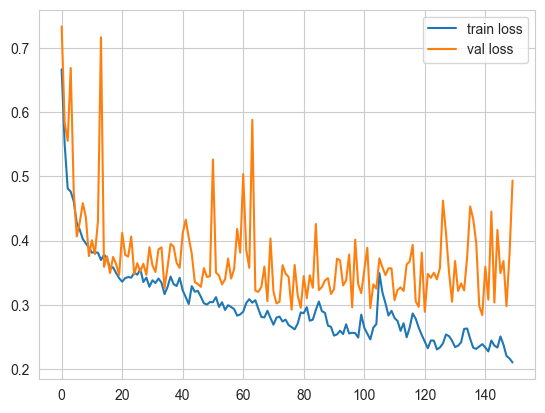

In [3]:
plt.figure(figsize=(12, 6), dpi=200)
results.loc[:, ['train loss', 'val loss']].plot()
plt.show()

In [4]:
metrics.describe().T

,count,mean,std,min,25%,50%,75%,max
overall accuracy,33.0,0.913639,0.087497,0.677048,0.893570,0.953125,0.974625,0.996704
change accuracy,33.0,0.427883,0.407424,0.000000,0.056976,0.245633,0.892098,0.999428
no change accuracy,33.0,0.921994,0.105163,0.636999,0.902535,0.971328,0.996935,1.000000
precision,32.0,0.291243,0.211843,0.000000,0.137132,0.251029,0.432533,0.833333
recall,33.0,0.411095,0.401486,0.000000,0.061367,0.217418,0.855436,0.997241
dice,29.0,0.288252,0.210807,0.016032,0.120778,0.218571,0.453800,0.693166
kappa,33.0,0.218253,0.198383,-0.008743,0.061249,0.144303,0.362835,0.660517


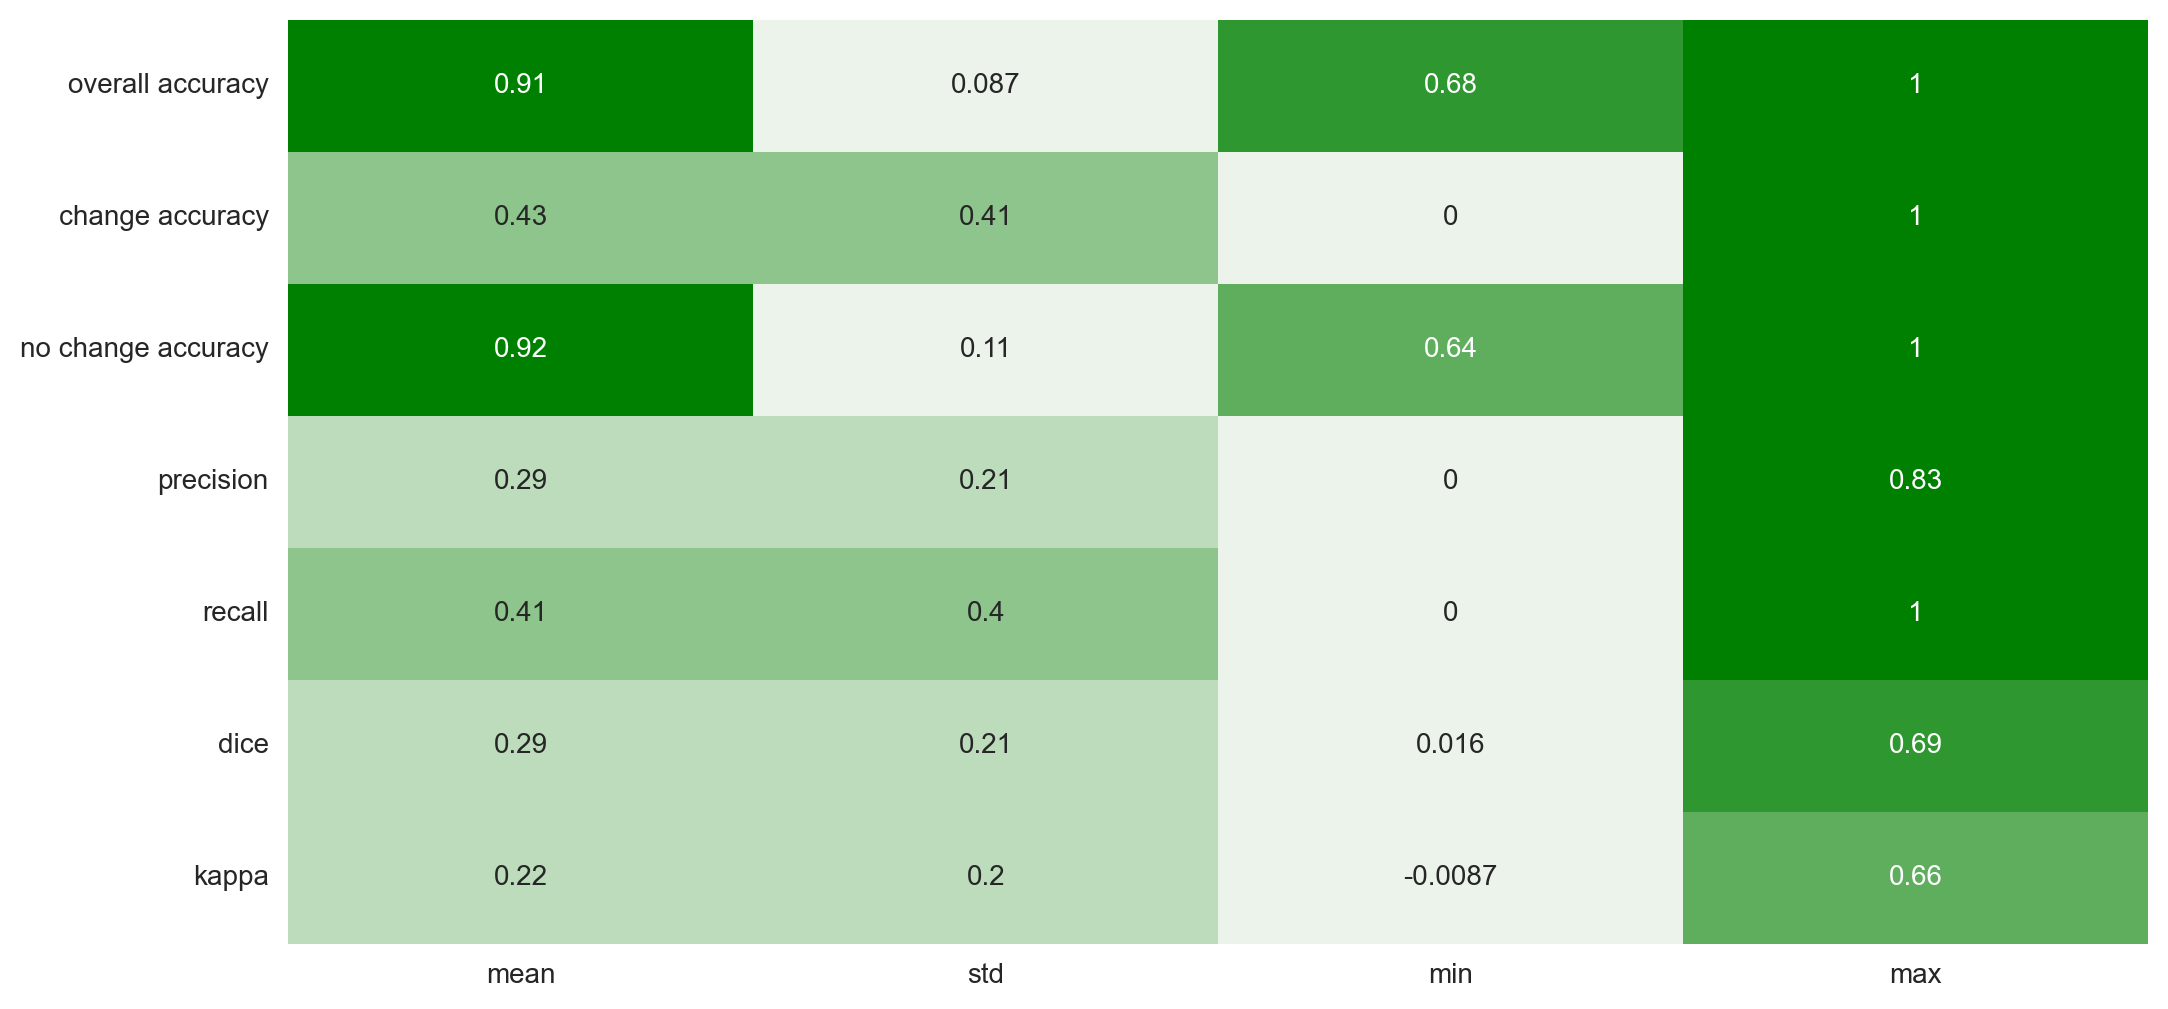

In [5]:
plt.figure(figsize=(12, 6), dpi=200)
sns.heatmap(metrics.describe().T[['mean', 'std', 'min', 'max']],
            annot=True,
            cbar=False,
            cmap=sns.light_palette('green'))
plt.show()

In [6]:
model = FCFERes(6, 2)
state = torch.load(f"./last-checkpoint.pth")
model.load_state_dict(state['model_state_dict'])
model = model.cuda()

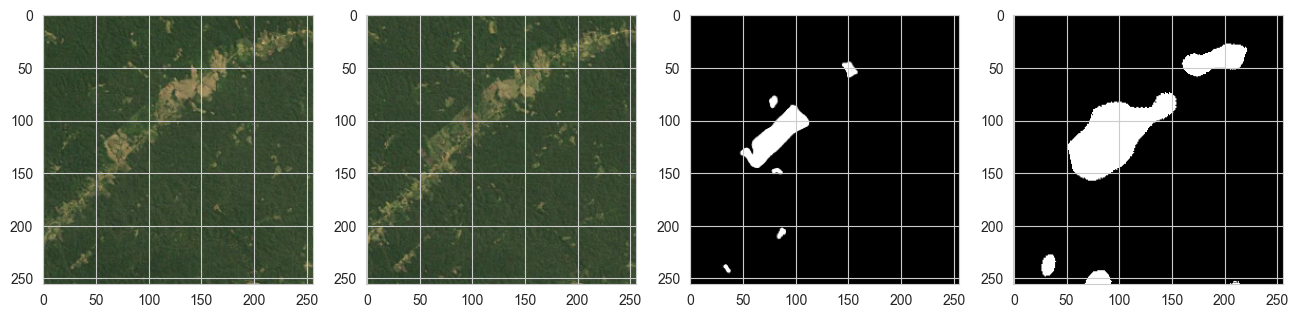

In [14]:
img_1, img_2, label, dir = df.sample(1).values.tolist()[0]
img1, img2, gt = get_img_trio(f'../../../data/annotated/{dir}/{img_1}',
                              f'../../../data/annotated/{dir}/{img_2}',
                              f'../../../data/annotated/{label}')

with torch.no_grad():
    model.eval()
    img = torch.cat((img1, img2))
    logits = model(img.unsqueeze(0).to('cuda'))[0].cpu()
    pred = torch.argmax(torch.sigmoid(logits), dim=0)

plt.figure(figsize=(16, 10))
plt.subplot(1, 4, 1)
plt.imshow(img1.permute(1, 2, 0), cmap='gray')
plt.subplot(1, 4, 3)
plt.imshow(gt, cmap='gray')
plt.subplot(1, 4, 2)
plt.imshow(img2.permute(1, 2, 0), cmap='gray')
plt.subplot(1, 4, 4)
plt.imshow(pred, cmap='gray')